# <center>ANN Binary Classification on Gender Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout
from imblearn.over_sampling import SMOTE

In [2]:
data =pd.read_csv('./gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data.shape

(5001, 8)

In [4]:
data.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [5]:
data.isnull().mean()*100
data.drop_duplicates(inplace= True)

In [6]:
le =LabelEncoder()

In [7]:
data['gender'] =le.fit_transform(data.gender)

In [8]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
sc= StandardScaler()

In [11]:
x = sc.fit_transform(x)

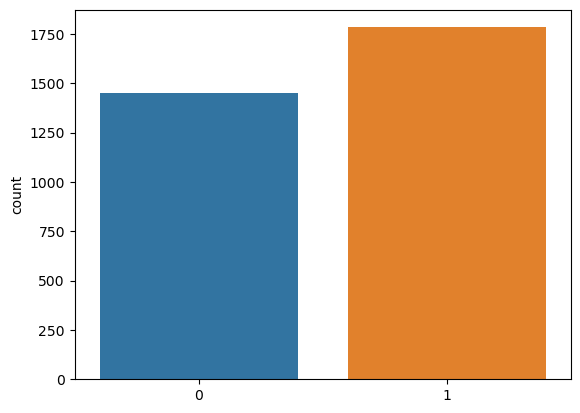

In [12]:
sns.countplot(x=y);


In [13]:
oversample =SMOTE()
x,y =oversample.fit_resample(x,y)

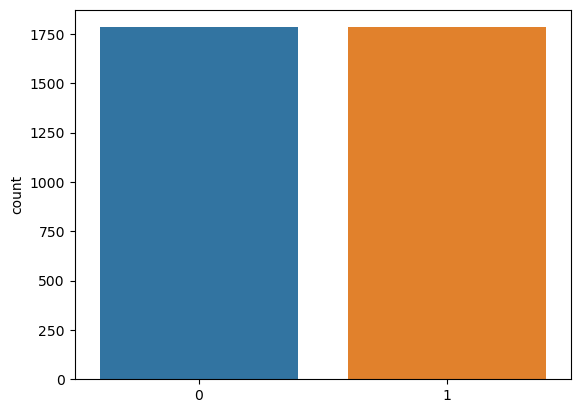

In [14]:
sns.countplot(x=y);

In [15]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
tf.random.set_seed(42)

In [17]:
model =Sequential()

### Adding Neuron 

In [18]:
model.add(Dense(128,activation='relu',input_dim =x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling The Model

In [19]:
model.compile(optimizer ='Adadelta',loss='binary_crossentropy',metrics=['accuracy'])

### Early Stopping Callback

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',patience=50,mode='min',restore_best_weights=True,
                              verbose =1)

### Model Training

In [21]:
history =model.fit(x_train,y_train,batch_size=32,callbacks=[early_stopping],epochs=500,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/500
90/90 [==============================] - 1s 4ms/step - loss: 0.7028 - accuracy: 0.5088 - val_loss: 0.7009 - val_accuracy: 0.5112
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.5144 - val_loss: 0.6975 - val_accuracy: 0.5112
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5298 - val_loss: 0.6940 - val_accuracy: 0.5126
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5316 - val_loss: 0.6905 - val_accuracy: 0.5154
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5379 - val_loss: 0.6871 - val_accuracy: 0.5182
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5351 - val_loss: 0.6837 - val_accuracy: 0.5252
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5515 - val_loss: 0.6802 - val_accuracy: 0.5308
Epoch 8/500
9

Epoch 59/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.8843 - val_loss: 0.5172 - val_accuracy: 0.9132
Epoch 60/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.8885 - val_loss: 0.5144 - val_accuracy: 0.9188
Epoch 61/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.8896 - val_loss: 0.5115 - val_accuracy: 0.9202
Epoch 62/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.8934 - val_loss: 0.5087 - val_accuracy: 0.9216
Epoch 63/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.8969 - val_loss: 0.5059 - val_accuracy: 0.9216
Epoch 64/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.8934 - val_loss: 0.5031 - val_accuracy: 0.9216
Epoch 65/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.8938 - val_loss: 0.5003 - val_accuracy: 0.9230
Epoch 

90/90 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.9383 - val_loss: 0.3737 - val_accuracy: 0.9580
Epoch 117/500
90/90 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.9369 - val_loss: 0.3715 - val_accuracy: 0.9580
Epoch 118/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.9362 - val_loss: 0.3694 - val_accuracy: 0.9580
Epoch 119/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.9309 - val_loss: 0.3672 - val_accuracy: 0.9580
Epoch 120/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.9397 - val_loss: 0.3651 - val_accuracy: 0.9580
Epoch 121/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.9316 - val_loss: 0.3629 - val_accuracy: 0.9580
Epoch 122/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.9425 - val_loss: 0.3608 - val_accuracy: 0.9580
Epoch 123/500

90/90 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9457 - val_loss: 0.2692 - val_accuracy: 0.9636
Epoch 174/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.9495 - val_loss: 0.2677 - val_accuracy: 0.9636
Epoch 175/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.9407 - val_loss: 0.2662 - val_accuracy: 0.9636
Epoch 176/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9453 - val_loss: 0.2648 - val_accuracy: 0.9636
Epoch 177/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9446 - val_loss: 0.2633 - val_accuracy: 0.9636
Epoch 178/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.9492 - val_loss: 0.2619 - val_accuracy: 0.9636
Epoch 179/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.9439 - val_loss: 0.2605 - val_accuracy: 0.9636
Epoch 180/500

90/90 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9492 - val_loss: 0.2029 - val_accuracy: 0.9650
Epoch 231/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9516 - val_loss: 0.2020 - val_accuracy: 0.9650
Epoch 232/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9506 - val_loss: 0.2011 - val_accuracy: 0.9650
Epoch 233/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9527 - val_loss: 0.2003 - val_accuracy: 0.9650
Epoch 234/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9481 - val_loss: 0.1994 - val_accuracy: 0.9650
Epoch 235/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9464 - val_loss: 0.1986 - val_accuracy: 0.9650
Epoch 236/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9534 - val_loss: 0.1978 - val_accuracy: 0.9650
Epoch 237/500

90/90 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9506 - val_loss: 0.1642 - val_accuracy: 0.9650
Epoch 288/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9481 - val_loss: 0.1636 - val_accuracy: 0.9650
Epoch 289/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9513 - val_loss: 0.1631 - val_accuracy: 0.9650
Epoch 290/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9488 - val_loss: 0.1626 - val_accuracy: 0.9650
Epoch 291/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9478 - val_loss: 0.1621 - val_accuracy: 0.9650
Epoch 292/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9446 - val_loss: 0.1616 - val_accuracy: 0.9650
Epoch 293/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9516 - val_loss: 0.1612 - val_accuracy: 0.9650
Epoch 294/500

90/90 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9513 - val_loss: 0.1412 - val_accuracy: 0.9650
Epoch 345/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9488 - val_loss: 0.1409 - val_accuracy: 0.9650
Epoch 346/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9523 - val_loss: 0.1406 - val_accuracy: 0.9650
Epoch 347/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9530 - val_loss: 0.1403 - val_accuracy: 0.9650
Epoch 348/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9488 - val_loss: 0.1400 - val_accuracy: 0.9650
Epoch 349/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9558 - val_loss: 0.1397 - val_accuracy: 0.9650
Epoch 350/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9488 - val_loss: 0.1394 - val_accuracy: 0.9650
Epoch 351/500

90/90 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9513 - val_loss: 0.1272 - val_accuracy: 0.9622
Epoch 402/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.9527 - val_loss: 0.1270 - val_accuracy: 0.9622
Epoch 403/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9492 - val_loss: 0.1268 - val_accuracy: 0.9608
Epoch 404/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9534 - val_loss: 0.1267 - val_accuracy: 0.9608
Epoch 405/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9516 - val_loss: 0.1265 - val_accuracy: 0.9608
Epoch 406/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9502 - val_loss: 0.1263 - val_accuracy: 0.9608
Epoch 407/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9534 - val_loss: 0.1261 - val_accuracy: 0.9608
Epoch 408/500

90/90 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9541 - val_loss: 0.1183 - val_accuracy: 0.9608
Epoch 459/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9506 - val_loss: 0.1182 - val_accuracy: 0.9608
Epoch 460/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9509 - val_loss: 0.1181 - val_accuracy: 0.9608
Epoch 461/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9523 - val_loss: 0.1180 - val_accuracy: 0.9608
Epoch 462/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9513 - val_loss: 0.1178 - val_accuracy: 0.9608
Epoch 463/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9523 - val_loss: 0.1177 - val_accuracy: 0.9608
Epoch 464/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9499 - val_loss: 0.1176 - val_accuracy: 0.9608
Epoch 465/500

### Evaluating the Model

In [22]:
history_dict =history.history

#### 1.Learning Curve

In [23]:
acc = history_dict['accuracy']
val_acc =history_dict['val_accuracy']

#### 2.Loss

In [24]:
loss = history_dict['loss']
val_loss =history_dict['val_loss']

#### 3.Range of x or number of epochs in the graphm

In [25]:
epochs = range(1,len(acc)+1)

#### 4.Plot

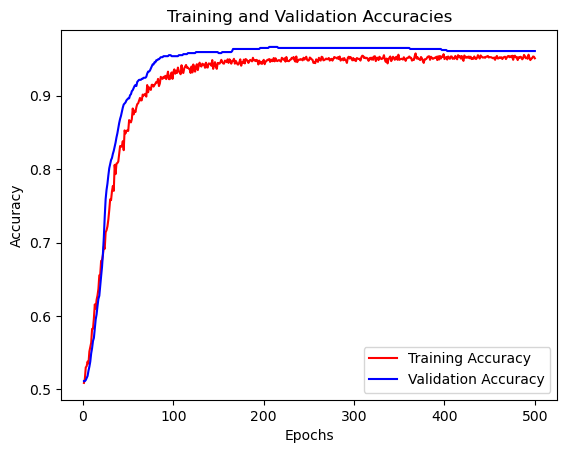

In [26]:
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label ='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
y_pred =model.predict(x_test)

23/23 [==============================] - 0s 879us/step


In [28]:
y_pred =(y_pred>0.5)

In [29]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [30]:
matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

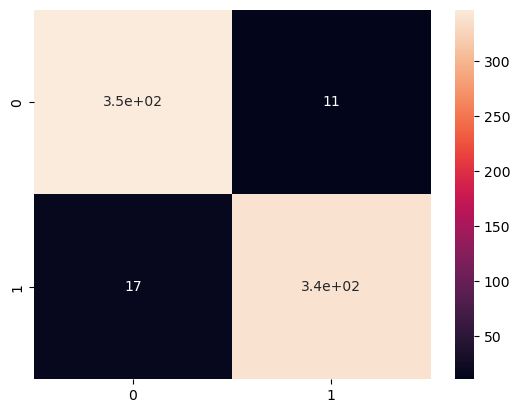

In [31]:
sns.heatmap(matrix,annot=True)

<h3> Classification Report
<h6><li>A classification report is a tool used in machine learning to evaluate the performance of a classification model. It provides a summary of various metrics that describe the model's performance, such as precision, recall, and F1-score

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       358
           1       0.97      0.95      0.96       356

    accuracy                           0.96       714
   macro avg       0.96      0.96      0.96       714
weighted avg       0.96      0.96      0.96       714

